In [1]:
# Importing
%matplotlib inline
import math
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import preprocessing
import seaborn as sns

In [2]:
from data_handler.DataHandler import DataHandler

c:\cstorage\program_files\python_envs\tf36\lib\site-packages\tensorflow\python\framework\dtypes.py:469: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\cstorage\program_files\python_envs\tf36\lib\site-packages\tensorflow\python\framework\dtypes.py:470: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\cstorage\program_files\python_envs\tf36\lib\site-packages\tensorflow\python\framework\dtypes.py:471: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\cstorage\program_files\python_envs\tf36\lib\site-

In [3]:
handler = DataHandler(readAllDataNow = True) 

In [4]:
columns = ['TarX', 'TarY', 'GazeX', 'GazeY', 'PosX', 'PosY', 'PosZ', 'OrX', 'OrY', 'OrZ']

In [5]:
subjects_raw = {i: handler.getAllDatasetPairsFor(i) for i in range(1, 2)}

In [6]:
subj = subjects_raw[1]

In [9]:
subj['infinity']

(array([[954., 525.],
        [948., 510.],
        [942., 495.],
        ...,
        [994., 557.],
        [980., 550.],
        [965., 543.]]),
 array([[-7.49052104e+07,  6.70316134e+07, -1.36818985e+07, ...,
          1.51810000e+05,  1.53712000e+05,  1.51810000e+05],
        [-2.95264687e+08,  3.08608179e+08, -1.36818986e+07, ...,
         -2.14748365e+09, -2.14748365e+09, -2.14748365e+09],
        [ 5.17651007e+08, -5.64262001e+08, -1.36818986e+07, ...,
         -2.72777700e+06, -2.35180300e+06, -2.72777700e+06],
        ...,
        [ 2.27451997e+03, -3.32788301e+02, -2.05658031e+02, ...,
          7.31000000e+02,  7.56000000e+02,  7.31000000e+02],
        [ 2.25092462e+03, -3.55332475e+02, -2.04527128e+02, ...,
          7.25000000e+02,  7.63000000e+02,  7.25000000e+02],
        [ 2.23653460e+03, -3.71699089e+02, -2.04420644e+02, ...,
          7.19000000e+02,  7.69000000e+02,  7.19000000e+02]]))

In [6]:
subjects = {}
correlations = []
for subj in subjects_raw:
    subjects[subj] = {}
    for t in subjects_raw[subj]:
        concatenated = np.concatenate((subjects_raw[subj][t][0],
                                       subjects_raw[subj][t][1][:, :8]), 
                                      axis = 1)
        df = pd.DataFrame(concatenated, columns = columns)
        df[['TarX', 'GazeX']] =  -1*df[['TarX', 'GazeX']]/5 + 192
        df[['TarY', 'GazeY']] = df[['TarY', 'GazeY']]/5 + 55
        subjects[subj][t] = df # (df-df.min())/(df.max()-df.min())
        correlations.append(subjects[subj][t].corr())

In [7]:
corr_df = correlations[0].copy()

In [8]:
for df in correlations[1:]:
    corr_df = corr_df.add(df)

In [9]:
corr_df

,TarX,TarY,GazeX,GazeY,PosX,PosY,PosZ,OrX,OrY,OrZ
TarX,17.000000,-0.851645,2.420035,0.644211,1.934378,1.124112,-0.985685,-0.792213,-2.324941,-0.857922
TarY,-0.851645,17.000000,-0.485750,1.554491,0.805463,1.535088,-0.827627,1.305726,0.338723,0.347402
GazeX,2.420035,-0.485750,17.000000,6.154837,9.520256,8.591679,-8.326141,-3.823981,-6.926350,-4.216822
GazeY,0.644211,1.554491,6.154837,17.000000,5.143602,5.932420,-4.386347,-0.458206,-2.506476,-2.445332
PosX,1.934378,0.805463,9.520256,5.143602,17.000000,16.329660,-15.886143,-6.552936,-6.858440,-2.446940
PosY,1.124112,1.535088,8.591679,5.932420,16.329660,17.000000,-15.645526,-5.837605,-6.038108,-1.779371
PosZ,-0.985685,-0.827627,-8.326141,-4.386347,-15.886143,-15.645526,17.000000,5.854185,5.339041,1.207904
OrX,-0.792213,1.305726,-3.823981,-0.458206,-6.552936,-5.837605,5.854185,17.000000,1.507196,3.458372
OrY,-2.324941,0.338723,-6.926350,-2.506476,-6.858440,-6.038108,5.339041,1.507196,17.000000,4.180315
OrZ,-0.857922,0.347402,-4.216822,-2.445332,-2.446940,-1.779371,1.207904,3.458372,4.180315,17.000000


In [10]:
avg = corr_df/len(correlations)

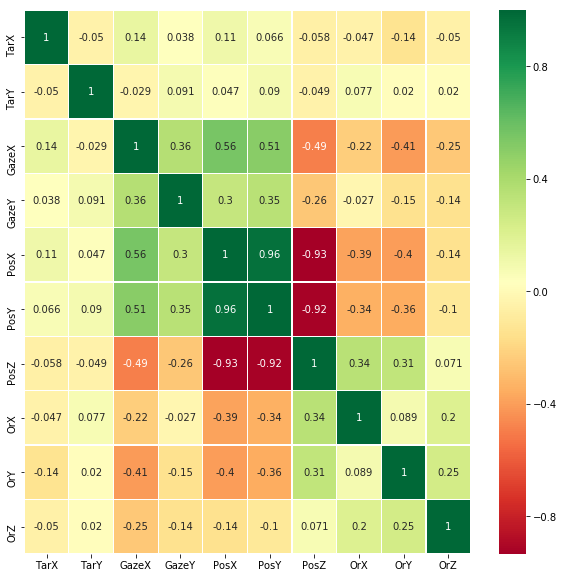

In [11]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(avg, ax=ax, annot=True,cmap='RdYlGn',linewidths=0.2);

In [12]:
table = avg[['TarX', 'TarY', 'GazeX', 'GazeY']].T.drop(columns=['TarX', 'TarY'])

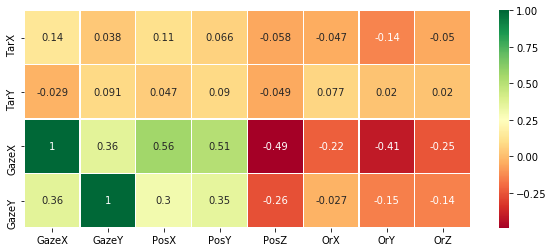

In [13]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.heatmap(table, ax=ax, annot=True,cmap='RdYlGn',linewidths=0.2);